In [1]:
import numpy as np
import json
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, r2_score

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path_base = 'D:/Study and Projects/School Work/Year 25 - PhD 1/Data/'

In [2]:
## Functions for sense embedding analysis

# Function to import a word embedding model from a file
def import_model(model_name, full_import=False, vocab_set=[]):
    """ string -> None
    Imports an embedding model, storing it in the model_embed_storage dictionary.
    """
        
    # open relevant file
    file_loc = 'Sense Embeddings\Dictionary Sense Embeddings//'
    filename = path_base+file_loc+model_name
    with open(filename) as file:
        lines = [line.rstrip('\n') for line in file]

    model_dict = {} # create word dictionary for specific model
    for line in lines:
        word_list = line.split()
        word = word_list[0]
        if full_import==False and word in vocab_set: # only  words for testing if full_import==False
            embedding_list = [float(x) for x in word_list[1:-1]] # store embeddings
            embedding_np = np.array(embedding_list)
            model_dict[word] = embedding_np
        elif full_import==True: # this will import all words in the vocab set, not just those for testing
            embedding_list = [float(x) for x in word_list[1:-1]] # store embeddings
            embedding_np = np.array(embedding_list)
            model_dict[word] = embedding_np
        else:
            continue

    return(model_dict)


# Function to calculate cosine similarity between two embeddings
def cosine_sim(embed_1, embed_2):
    """ numpy_array, numpy_array -> float
    Returns the cosine similarity (-1 to 1) between two embeddings, inputted as vectors.
    """
    if np.dot(embed_1,embed_2) == 0:
        similarity = 0 # don't normalise if similarity is zero
    else:
        similarity = np.dot(embed_1,embed_2)/(np.linalg.norm(embed_1)*np.linalg.norm(embed_2))
        #similarity, _ = spearmanr(embed_1, embed_2)
    return(similarity)


# Function to load word similarity data for specified dataset
def import_dataset(dataset_name):
    """ string -> None
    Imports a dataset, storing a value of the form (list, numpy_array) in the dataset_storage dictionary.
    """
    file_loc = 'Word Similarity Data/Word Similarities Final//'
    filename = path_base+file_loc+dataset_name
    with open(filename) as file:
        lines = file.readlines()

    wordpairs = [None]*len(lines) # initialise storage
    ratings = [None]*len(lines)
    i=0
    for line in lines:
        line = line.strip() # remove new line chars
        wordpairs[i] = line.split() # split at any whitespace chars
        ratings[i] = float(wordpairs[i][2])
        wordpair_str = wordpairs[i][0]+' '+wordpairs[i][1]
        i=i+1
    ratings = np.array(ratings)

    return(wordpairs,ratings)

# Function to load a specific word embedding model
def import_word_model(model_path):
    """ string -> None
    Imports an embedding model, storing it in the model_embed_storage dictionary.
    """
    # open relevant file
    with open(model_path, encoding='utf-8') as file:
        lines = [line.rstrip('\n') for line in file]
    
    # create word dictionary for specific model
    model_dict = {}  
    for line in lines:
        word_list = line.split()
        word = word_list[0]
        embedding_list = [float(x) for x in word_list[1:-1]] # store embeddings
        embedding_np = np.array(embedding_list)
        model_dict[word] = embedding_np
        
    return(model_dict)

In [4]:
# Import word similarity dataset 
simverb = import_dataset('EN-SimVerb-3200-mod.txt')
calc_sim_dict = {}
correls_dict = {}
expr_sims = np.array(np.array(simverb[0])[:,2],dtype=float) # experimental similarities

### Load and calculate correlation of other SimVerb embeddings

In [5]:
## ConceptNet embeddings

# Load ConceptNet embeddings
model_address = path_base+'\Word Embeddings\ConceptNet Embeddings\\numberbatch-en.txt'
conceptnet_embeds = import_word_model(model_address)

# Compute ConceptNet similarities
conceptnet_sims = []
for word_pair in simverb[0]:
    word_1_embed = conceptnet_embeds[word_pair[0]]
    word_2_embed = conceptnet_embeds[word_pair[1]]
    conceptnet_sims.append(cosine_sim(word_1_embed,word_2_embed))


In [6]:
## Ernie base embeddings

# Load Ernie_base embeddings
model_address = path_base+'\Word Embeddings\Ernie Base Embeddings\\ernie-2.0-en-layer-5.txt'
ernie_base_embeds = import_word_model(model_address)

# Compute Ernie_base similarities
ernie_base_sims = []
for word_pair in simverb[0]:
    word_1_embed = ernie_base_embeds[word_pair[0]]
    word_2_embed = ernie_base_embeds[word_pair[1]]
    ernie_base_sims.append(cosine_sim(word_1_embed,word_2_embed))

In [8]:
## Ernie wikipedia generic embeddings

# Load Ernie_wiki embeddings
model_address = path_base+'\Word Embeddings\Ernie Wikipedia Embeddings\Generic Embeddings\\contextual_embeddings_layer_normalised_5.txt'
ernie_wiki_generic_embeds = import_word_model(model_address)

# Compute Ernie_wiki similarities
ernie_wiki_generic_sims = []
for word_pair in simverb[0]:
    word_1_embed = ernie_wiki_generic_embeds[word_pair[0]]
    word_2_embed = ernie_wiki_generic_embeds[word_pair[1]]
    ernie_wiki_generic_sims.append(cosine_sim(word_1_embed,word_2_embed))

In [7]:
## Ernie wikipedia verb embeddings

# Load Ernie_wiki embeddings
model_address = path_base+'\Word Embeddings\Ernie Wikipedia Embeddings\Verb Embeddings\\contextual_embeddings_layer_normalised_5.txt'
ernie_wiki_verb_embeds = import_word_model(model_address)

# Compute Ernie_wiki similarities
ernie_wiki_verb_sims = []
for word_pair in simverb[0]:
    word_1_embed = ernie_wiki_verb_embeds[word_pair[0]]
    word_2_embed = ernie_wiki_verb_embeds[word_pair[1]]
    ernie_wiki_verb_sims.append(cosine_sim(word_1_embed,word_2_embed))

In [9]:
## Ernie Oxford embeddings

# Load Oxford embeddings
model_address = path_base+'\Word Embeddings\Ernie Oxford Embeddings\Combined Embeddings\\normalised_5.txt'
ernie_Oxford_embeds = import_word_model(model_address)

# Compute Ernie_wiki similarities
ernie_Oxford_sims = []
for word_pair in simverb[0]:
    try:
        word_1_embed = ernie_Oxford_embeds[word_pair[0]]
    except KeyError: # a few words a missing in Oxford for some reason
        word_1_embed = ernie_wiki_verb_embeds[word_pair[0]]
    try:
        word_2_embed = ernie_Oxford_embeds[word_pair[1]]
    except KeyError:
        word_2_embed = ernie_wiki_verb_embeds[word_pair[1]]
        
    ernie_Oxford_sims.append(cosine_sim(word_1_embed,word_2_embed))

In [18]:
## Ernie Dictionary max similarities
file_location = 'D:\Study and Projects\School Work\Year 25 - PhD 1\Data\Analysis Results\Word Similarities\Model vs Dataset Results\Sense embed sims\ernie_dictionary_max_5_SimVerb_mod_results.txt'
with open(file_location, "r") as file:
    ernie_max = np.loadtxt(file,  delimiter=',', dtype='str')
ernie_Dictionary_max_embeds = ernie_max[:,1].astype('float')

In [21]:
## Ernie Dictionary mean similarities
file_location = 'D:\Study and Projects\School Work\Year 25 - PhD 1\Data\Analysis Results\Word Similarities\Model vs Dataset Results\Sense embed sims\ernie_dictionary_mean_5_SimVerb_mod_results.txt'
with open(file_location, "r") as file:
    ernie_mean = np.loadtxt(file,  delimiter=',', dtype='str')
ernie_Dictionary_mean_embeds = ernie_mean[:,1].astype('float')

### Plot results by degree of polysemy

In [24]:
## Define functions for plotting

# Add subplot to main plot
def add_subplot(fig, plot_num, subplot_name, data, model_name, reg_type, y_label, x_label, label_size):
    
    # generate figure
    xs = data[:,0]
    ys = data[:,1]
    dot_size = 6
    fig_axis = fig.add_subplot(plot_num) #create figure subplot
    fig_axis.scatter(xs, ys, s=dot_size) # 's' gives dot size
           
    # set key parameters for labels on figure
    if model_name=='ERNIE Base':
        fig_axis.set_ylim(0.25,1.02)
    else:
        fig_axis.set_ylim(-0.15,1.02)
    fig_axis.set_xlim(-0.02,1.02)
    fig_axis.tick_params(axis='y', which='both', labelsize=label_size) # change size of tick labels
    fig_axis.tick_params(axis='x', which='both', labelsize=label_size)
    if y_label == False: # turn off tick labels when not needed
        fig_axis.set(yticklabels=[])
    else:
        fig_axis.set_ylabel(model_name, fontsize=label_size)
    if x_label == False:
        fig_axis.set(xticklabels=[])
    else:
        fig_axis.set_xlabel(subplot_name, fontsize=label_size)
    
    # calculate values needed for regressions and plotting
    x_range = np.arange(0, 1, step=0.01)
    x_range_sq = PolynomialFeatures(degree=2).fit_transform(x_range.reshape(-1, 1))
    xs_sq = PolynomialFeatures(degree=2).fit_transform(xs.reshape(-1, 1))
    
    # add linear reg line
    if reg_type=='linear':
        lin_regression = lin_reg(data) # linear regression
        fig_axis.plot(x_range, lin_regression.predict(x_range.reshape(-1, 1)), color='red', linewidth=1.5) 
        # r_square_lin = r2_score(ys, lin_regression.predict(xs.reshape(-1, 1)))
        # fig_axis.text(0.05, 0.85, 'R-sq: {:.3f}'.format(r_square_lin), size=label_size) # add label for R-square value
        correlation = spearmanr(ys, xs)[0]
        fig_axis.text(0.05, 0.85, 'ρ: {:.3f}'.format(correlation), size=label_size) # add label for correlation
        
    # add poly reg line
    elif reg_type=='poly':
        poly_regression = poly_reg(data) # polynomial regression
        fig_axis.plot(x_range, poly_regression.predict(x_range_sq), color='blue', linewidth=1.5) 
        r_square_poly = r2_score(ys, poly_regression.predict(xs_sq))
        fig_axis.text(0.05, 0.85, 'R-sq: {:.3f}'.format(r_square_poly), size=label_size) # add label for R-square value
    
# Linear regression
def lin_reg(data):
    xs = data[:,0]
    ys = data[:,1]
    regression = LinearRegression()
    regression.fit(xs.reshape(-1, 1), ys)
    return(regression)

# Polynomial regression
def poly_reg(data):
    xs = data[:,0]
    ys = data[:,1]
    xs_sq = PolynomialFeatures(degree=2).fit_transform(xs.reshape(-1, 1))
    regression = LinearRegression()
    regression.fit(xs_sq, ys)
    return(regression)

# Function for plotting a figure with multiple subplots
def plot_by_polysemy_score(expr_sims, full_polysemy_score_list, sim_data, model_name, show_xlabel):

    # define main plot
    width = 16
    if model_name=='ERNIE Base':
        height = (2/3)*3.5
    else:
        height = 3.5
    sns.set()
    fig = plt.figure(figsize=(width,height), facecolor='white', dpi=150)
    fig.subplots_adjust(wspace=0.05, hspace=0.5)
    subplots = ['Polysemy: 2-4', 'Polysemy: 5-8', 'Polysemy: 9+']

    # generate series of subplots using function
    counts_by_polysemy = {}
    data_by_polysemy = {}
    for num,subplot_name in enumerate(subplots):
        plot_num = int(str(13)+str(num+1)) # last int gives subplot number
        
        # separate the data by polysemy score
        subset_of_sim_data = []
        for i,wordpair in enumerate(expr_sims):
            if subplot_name=='Polysemy: 2-4' and (full_polysemy_score_list[i] in {2,3,4}):
                subset_of_sim_data.append([expr_sims[i],sim_data[i]])
                show_ylabel=True
            elif subplot_name=='Polysemy: 5-8' and (full_polysemy_score_list[i] in {5,6,7,8}):
                subset_of_sim_data.append([expr_sims[i],sim_data[i]])
                show_ylabel=False
            elif subplot_name=='Polysemy: 9+' and (full_polysemy_score_list[i] in {9,10,11,12}):
                subset_of_sim_data.append([expr_sims[i],sim_data[i]])
                show_ylabel=False
        
        # story polysemy counts and data
        counts_by_polysemy[subplot_name] = len(subset_of_sim_data)
        data_by_polysemy[subplot_name] = subset_of_sim_data
        
        # add each subplot
        add_subplot(fig, plot_num, subplot_name, np.array(subset_of_sim_data), model_name, reg_type='linear', y_label=show_ylabel, x_label=show_xlabel, label_size=16)
    plt.show()
    
    return(data_by_polysemy,counts_by_polysemy)

In [11]:
## Compute the number of senses for each wordpair

# Load number of senses for each word in SimVerb corpus
with open(path_base+'Corpus Data//Dictionary Verb Corpus//Vocab lists//verb_polysemy_scores.txt', encoding='utf-8') as file:
    lines = [line.rstrip('\n') for line in file]

# dictionary with number of senses for each word
polysemy_dict = {}
for line in lines:
    word_list = line.split()
    word = word_list[0]
    polysemy_score = word_list[1]
    polysemy_dict[word] = int(polysemy_score)

# dictionary with sum of word senses for each word pair
full_polysemy_score_list = []
for word_pair in simverb[0]:
    total_polysemy_score = polysemy_dict[word_pair[0]] + polysemy_dict[word_pair[1]]
    full_polysemy_score_list.append(total_polysemy_score)

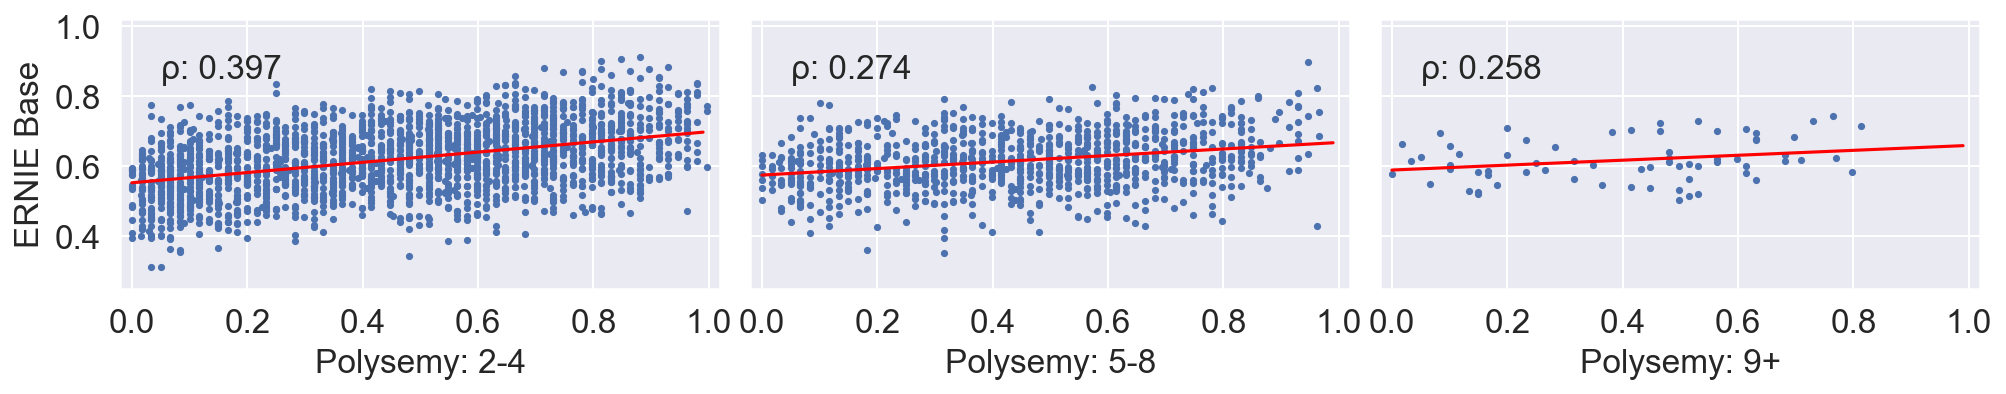

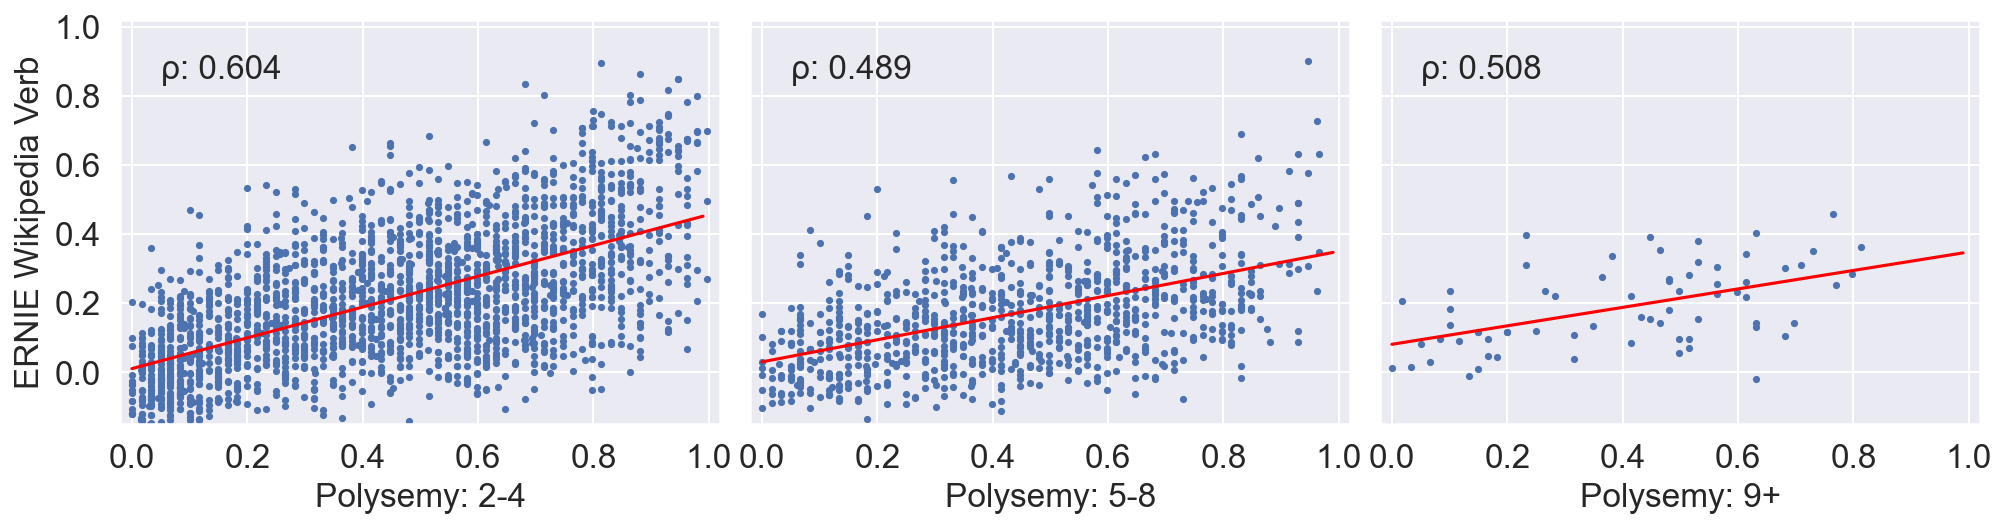

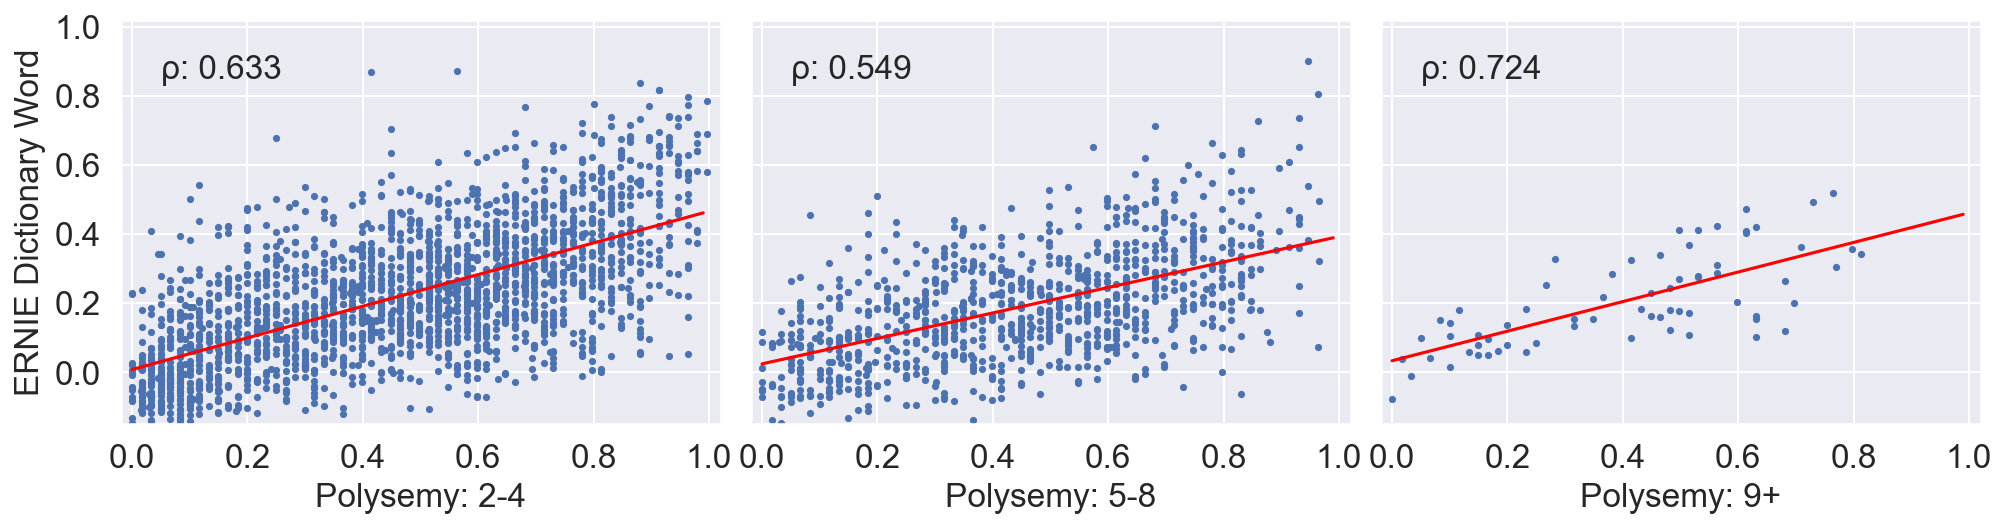

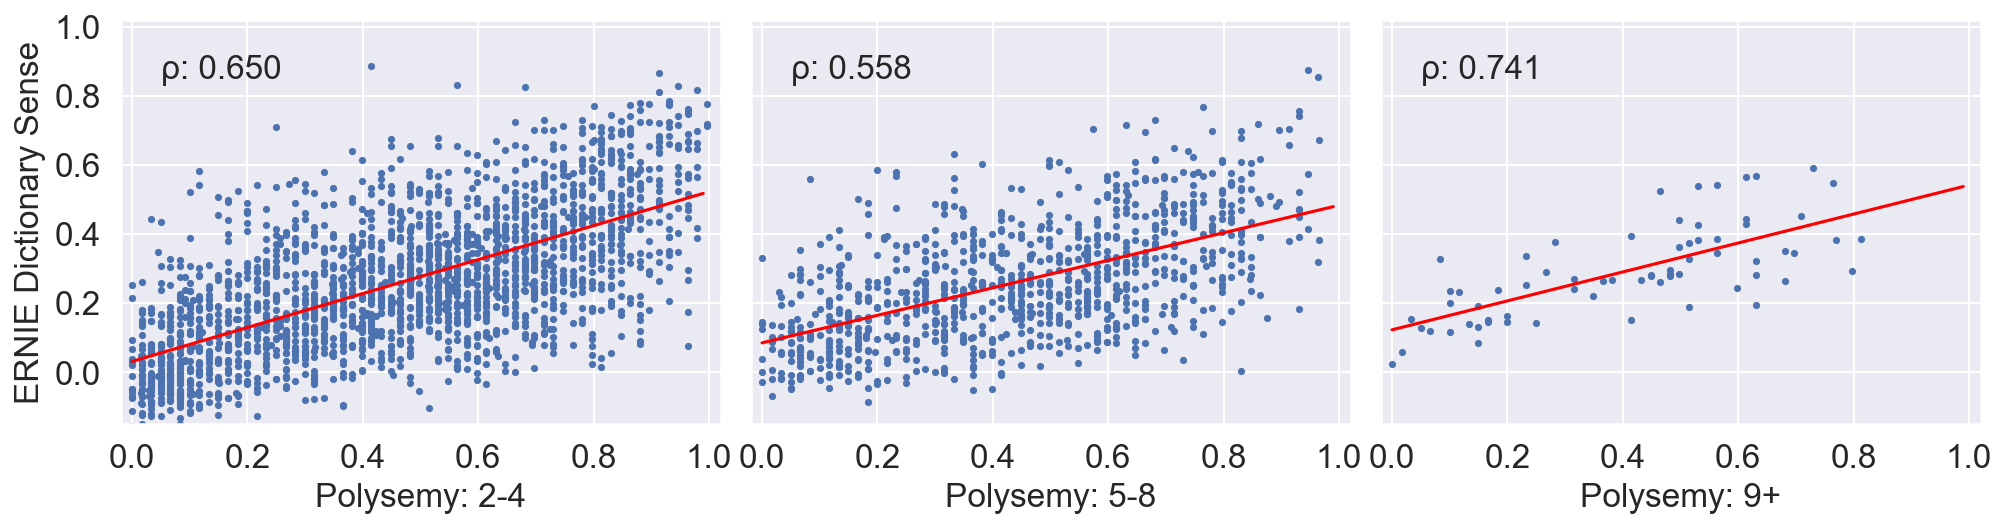

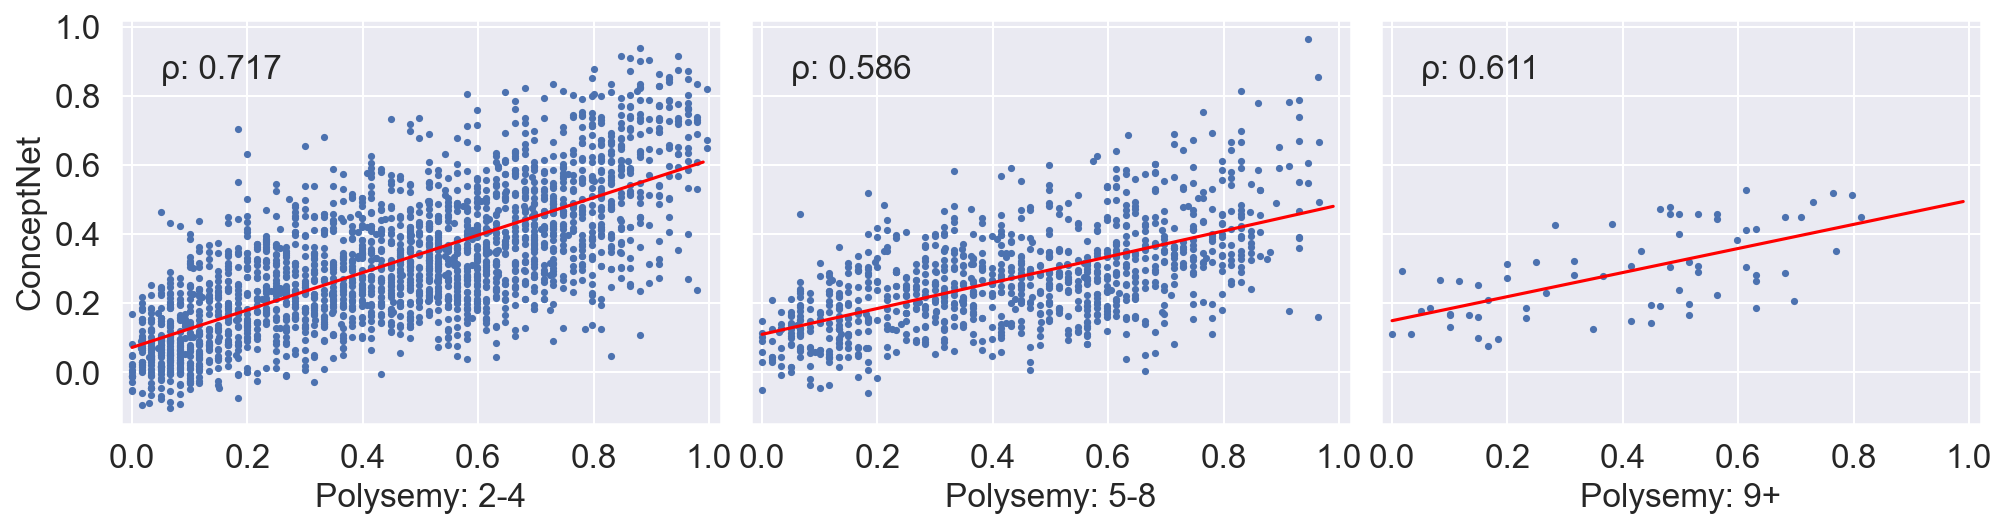

In [25]:
# Generate scatterplots
model_sims_dict = {'ERNIE Base':ernie_base_sims, 'ERNIE Wikipedia Verb':ernie_wiki_verb_sims, 'ERNIE Dictionary Word':ernie_Oxford_sims, 'ERNIE Dictionary Sense':ernie_Dictionary_max_embeds, 'ConceptNet':conceptnet_sims}
data_by_polysemy_score = {}
for model in model_sims_dict.keys():
    data_by_polysemy_score[model] = plot_by_polysemy_score(expr_sims, full_polysemy_score_list, model_sims_dict[model], model_name=model, show_xlabel=True)

### Produce bootstraps of correlations

In [37]:
## Functions for bootstrapping

# Bootstrap a set of draws for a given dataset and model
def single_bootstrap(dataset_similarities, model_similarities):
    n = len(dataset_similarities) # number of word pairs
    rd_vocab_model_sims = np.zeros(n)
    rd_vocab_dataset_sims = np.zeros(n)
    
    # Generate bootstrap sample
    index_list = np.arange(0,n)
    rd_indices = np.random.choice(index_list,n) # get random indices for word pairs in bootstrap
    i=0
    for index in rd_indices:
        rd_vocab = rd_indices[index] # get random vocab pair
        rd_vocab_model_sims[i] = model_similarities[index] # add model similarity
        rd_vocab_dataset_sims[i] = dataset_similarities[index] # add experimental similarity
        i=i+1

    # Calculate correlations
    pearson_r = np.corrcoef(rd_vocab_dataset_sims, rd_vocab_model_sims)[0,1] # correlation with masks
    spearman_r, p = spearmanr(rd_vocab_dataset_sims, rd_vocab_model_sims)
    return(pearson_r, spearman_r)


# Compute a series of bootstrap samples for a given model and dataset
def set_of_bootstraps(dataset_similarities, model_similarities, num_samples):
    corr_samples_pearson = []
    corr_samples_spearman = []
    for bootstrap_run in np.arange(0,num_samples):
        correlations = single_bootstrap(dataset_similarities, model_similarities)
        corr_samples_pearson.append(correlations[0])
        corr_samples_spearman.append(correlations[1])
    return(corr_samples_pearson, corr_samples_spearman)

# Print bootstrap percentile results
def bootstrap_percentiles(dataset_similarities, model_similarities, num_samples):
    corr_bootstraps = set_of_bootstraps(dataset_similarities, model_similarities, num_samples=num_samples)
    pt_025, pt_500, pt_975 = np.percentile(corr_bootstraps, [2.5,50,97.5]) # get percentiles for 95% CI
    return(pt_025,pt_500,pt_975)

In [97]:
## Compute 95% CI using bootstrapping for correlations by polysemy score

bootstrap_results = {}
for model in data_by_polysemy_score.keys():
    model_data_by_polysemy = data_by_polysemy_score[model][0] # get data for a single model
    all_model_results = {}
    
    # compute bootstraps for each polysemy group
    for polysemy in model_data_by_polysemy.keys():
        single_polysemy_data = np.array(model_data_by_polysemy[polysemy]) # get data for a single model and single polysemy
        expr_sims_by_polysemy = single_polysemy_data[:,0]
        model_sims_by_polysemy = single_polysemy_data[:,1]
        all_model_results[polysemy] = bootstrap_percentiles(expr_sims_by_polysemy, model_sims_by_polysemy, num_samples=1000)
    
    # store all results for a single model
    bootstrap_results[model] = all_model_results 

In [99]:
# Print bootstrapping results
for model in bootstrap_results.keys():
    model_bootstraps = bootstrap_results[model]
    all_values = list(np.array(list(model_bootstraps.values())).flatten())
    print('{:<22}'.format(model)+'Low: ({:.3f},{:.3f},{:.3f}) - Med: ({:.3f},{:.3f},{:.3f}) - High: ({:.3f},{:.3f},{:.3f})'.format(*all_values))

ERNIE base            Low: (0.366,0.407,0.444) - Med: (0.212,0.279,0.338) - High: (0.028,0.259,0.459)
ERNIE wikipedia verb  Low: (0.577,0.610,0.639) - Med: (0.440,0.492,0.537) - High: (0.299,0.517,0.677)
ERNIE Oxford          Low: (0.609,0.637,0.664) - Med: (0.505,0.554,0.601) - High: (0.586,0.725,0.826)
ERNIE Dictionary max  Low: (0.626,0.654,0.680) - Med: (0.511,0.565,0.608) - High: (0.600,0.730,0.828)
ConceptNet            Low: (0.695,0.719,0.740) - Med: (0.544,0.593,0.632) - High: (0.471,0.621,0.739)


### Extra stuff

In [320]:
def get_rsquare_by_polysemy_score(expr_sims, full_polysemy_score_list, sim_data, model_name):

    # define main plot
    width = 15
    height = 3
    fig = plt.figure(figsize=(width,height), facecolor='white', dpi=100)
    fig.subplots_adjust(wspace=0.25, hspace=0.5)
    subplots = np.arange(2,10)

    # generate series of subplots using function
    counts_by_polysemy = []
    r_square_values = []
    for num,subplot in enumerate(subplots):
        plot_num = int(str(33)+str(num+1)) # last int gives subplot number
        
        subset_of_sim_data = []
        for i,wordpair in enumerate(expr_sims):
            if subplot<9 and (full_polysemy_score_list[i]==subplot):
                subset_of_sim_data.append([expr_sims[i],sim_data[i]])
            elif subplot>=9 and (full_polysemy_score_list[i] in {9,10,11,12}):
                subset_of_sim_data.append([expr_sims[i],sim_data[i]])           
        
        counts_by_polysemy.append(len(subset_of_sim_data))
        r_square_values.append(add_subplot(fig, plot_num, subplot, np.array(subset_of_sim_data), model_name, reg_type='linear'))
    sns.set()
    plt.close(fig) # prevent figure from showing
    
    return(np.array(r_square_values),counts_by_polysemy)

In [321]:
get_rsquare_by_polysemy_score(expr_sims, full_polysemy_score_list, conceptnet_sims, model_name='ConceptNet')

(array([0.56464665, 0.5085606 , 0.49981441, 0.4176443 , 0.24721883,
        0.32331297, 0.38800737, 0.3927452 ]),
 [599, 857, 732, 444, 218, 181, 115, 68])

In [ ]:
## Bar plot for comparing improvements due to adding context
fig, ax = plt.subplots(figsize=(6,4))

# data to use
ernie_base_corrs = [0.397,0.274,0.258]
ernie_wiki_verb_corrs = [0.604,0.489,0.508]
ernie_dict_sense_corrs = [0.650,0.558,0.741]
bar_width = 0.2

# add bars and error bars
ax.bar(x=np.arange(len(ernie_base_corrs))-3*bar_width/2, height=ernie_base_corrs, width=bar_width, tick_label=np.arange(1,len(ernie_base_corrs)+1), label='ERNIE base')
# ax.errorbar(x=np.arange(len(data1))-bar_width, y=data1, yerr=errors1, fmt=',', capsize=4, color="#273be2")
ax.bar(x=np.arange(len(ernie_wiki_verb_corrs))-bar_width/2, height=ernie_wiki_verb_corrs, width=bar_width, label='ERNIE Wiki Verb', color="r")
# ax.errorbar(x=np.arange(len(data2)), y=data2, yerr=errors2, fmt=',', capsize=4, color="#b22222")
ax.bar(x=np.arange(len(ernie_dict_sense_corrs))+bar_width/2, height=ernie_dict_sense_corrs, width=bar_width, label='ERNIE Dict Sense')

# add labels and axes
ax.set_ylabel('Correlation coefficient', fontsize=16)
ax.set_xlabel('Polysemy level', fontsize=16)
ax.set_xlim(-1,3)
ax.set_ylim(0,1)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=14)
plt.show()